## Prerequisite Test for ES 335 Machine Learning - Spring 2024
Name - Vannsh Jani  
Roll No - 22110279

#### Question 1

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

##### Answer

When we perform matrix multiplication between a (n,k) and (k,m) matrix, we get a (n,m) matrix. Let us call the (n,k) matrix as 'A' and the (k,m) matrix as 'B'. One of the ways to multiply the two matrices is to take the pairwise dot product between the rows of one matrix and the columns of the other matrix. Let us consider the rows of A and the columns of B. Each row in A and column in B has k entries. Hence for one such dot product we will have k multiplications and k-1 additions and one such dot product will give us one of the entries in the resultant (n,m) matrix. Hence, these operations will occur $\text n.\text m$ times for all entries.  
Hence,  
Number of multiplications is $\text {k.m.n}$.  
Number of additions is $(\text k-1).\text {m.n}$. 

#### Question 2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

##### Answer

Let us take $\text n=5, \text m=4, \text k=3$. A is a (5,3) matrix and B is a (3,4) matrix.

 Let $\quad  \text A = \begin{bmatrix} 2 & 3 & 5 \\ 4 & 1 & 6 \\ 9 & 8 & 9 \\ 1 & 2 & 4 \\ 7 & 10 & 3 \end{bmatrix},\quad  \text B = \begin{bmatrix} 9 & 1 & 5 & 3 \\ 4 & 12 & 2 & 0 \\ 11 & 4 & 2 & 9 \end{bmatrix} $

In [1]:
import time
# list of lists method

A = [[2,3,5],[4,1,6],[9,8,9],[1,2,4],[7,10,3]]
B = [[9,1,5,3],[4,12,2,0],[11,4,2,9]]

print(f"Matrix A: {A}")
print(f"Matrix B: {B}")
print()

print("Multip[lying A and B by considering rows of A and columns of B")
print()
start = time.time()
C = []
n_rows_A = len(A)
n_cols_B = len(B[0])
for row in A:
    C_row = []
    for col in range(n_cols_B):
        C_row.append(sum([row[i]*B[i][col] for i in range(len(row))]))
    C.append(C_row)
end = time.time()
print()
print(f"Matrix C=AB: {C}")
print("C has 5 rows and 4 columns")
print(f"Time taken for lists method: {end-start} seconds")



Matrix A: [[2, 3, 5], [4, 1, 6], [9, 8, 9], [1, 2, 4], [7, 10, 3]]
Matrix B: [[9, 1, 5, 3], [4, 12, 2, 0], [11, 4, 2, 9]]

Multip[lying A and B by considering rows of A and columns of B


Matrix C=AB: [[85, 58, 26, 51], [106, 40, 34, 66], [212, 141, 79, 108], [61, 41, 17, 39], [136, 139, 61, 48]]
C has 5 rows and 4 columns
Time taken for lists method: 0.00011110305786132812 seconds


In [2]:
# numpy method
import numpy as np
A = np.array([[2,3,5],[4,1,6],[9,8,9],[1,2,4],[7,10,3]])
B = np.array([[9,1,5,3],[4,12,2,0],[11,4,2,9]])
start = time.time()
C = np.matmul(A,B)
end = time.time()
print(f"C = AB: {C}")
print(f"Time taken for numpy method: {end-start} seconds")

C = AB: [[ 85  58  26  51]
 [106  40  34  66]
 [212 141  79 108]
 [ 61  41  17  39]
 [136 139  61  48]]
Time taken for numpy method: 1.9788742065429688e-05 seconds


Time taken for lists method is roughly $1.11 \text x 10^{-4}$ seconds.  
Time taken for numpy method is roughly $1.97  \text x 10^{-5}$ seconds.  

This difference enlarges and numpy will take much less time when the matrices are larger in size.

In [3]:
# creating a random large matrix using lists

import random
n = 1000
k = 500
m = 800
A = [[random.randint(0,100) for i in range(k)] for j in range(n)]
B = [[random.randint(0,100) for i in range(m)] for j in range(k)]

print("Multip[lying A and B by considering rows of A and columns of B")
print()
start = time.time()
C = []
n_rows_A = len(A)
n_cols_B = len(B[0])
for row in A:
    C_row = []
    for col in range(n_cols_B):
        C_row.append(sum([row[i]*B[i][col] for i in range(len(row))]))
    C.append(C_row)
end = time.time()
print(f"Time taken for lists method: {end-start} seconds")



Multip[lying A and B by considering rows of A and columns of B

Time taken for lists method: 17.365705013275146 seconds


In [4]:
# numpy method

A = np.array(A)
B = np.array(B)
start = time.time()
C = np.matmul(A,B)
end = time.time()
print(f"Time taken for numpy method: {end-start} seconds")


Time taken for numpy method: 0.16290903091430664 seconds


Numpy is implemented in C which is a low level language and hence, the operations are faster than python. Numpy utilizes parallelized computing and hence can perform operations on entire arrays or matrices at once whereas in python lists, the operations are performed one after the other as we iterate through the list. Hence, for these reasons numpy performs calculations faster than python lists.

#### Question 3

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

##### Answer

The median is the middle element in a sorted array if the length of the array is odd and it is the average of the middle two numbers if the length of the array is even. Using the above method, since we know the length of the array (say n), we can find the (n/2)th largest element in (n/2) passes of the array which is $\Theta (\text n^2)$ time.  
A better method would be to sort the array and return the middle element of the array which takes $\Theta (\text {nlogn})$ time.

In [5]:
import time
import numpy as np

A = [7,1,5,9,2,5,3,8,7,1,6,4,6,8,2,7]
# quadratic time method
def median_quad(A):
    n = len(A)
    highest_values = []
    for i in range((n//2)+1):
        highest = A[0]
        for j in range(len(A)):
            if A[j] > highest:
                highest = A[j]
        highest_values.append(highest)
        A.remove(highest)
    if n%2 == 0:
        return (highest_values[-1]+highest_values[-2])/2
    else:
        return highest_values[-1]
start = time.time()
median = median_quad(A)
end = time.time()    
print(f"Median of A: {median}")
print(f"Time taken for quadratic method: {end-start} seconds")

    

Median of A: 5.5
Time taken for quadratic method: 2.193450927734375e-05 seconds


In [6]:
# nlogn time method
A = [7,1,5,9,2,5,3,8,7,1,6,4,6,8,2,7]

def median_nlogn(A):
    n = len(A)
    A.sort()
    if n%2 == 0:
        return (A[n//2]+A[(n//2)-1])/2
    else:
        return A[n//2]

start = time.time()
median = median_nlogn(A)
end = time.time()    
print(f"Median of A: {median}")
print(f"Time taken for nlogn method: {end-start} seconds")
    


Median of A: 5.5
Time taken for nlogn method: 1.4781951904296875e-05 seconds


In [7]:
# numpy method
A = np.array([7,1,5,9,2,5,3,8,7,1,6,4,6,8,2,7])
start = time.time()
median = np.median(A)
end = time.time()
print(f"Median of A: {median}")
print(f"Time taken for numpy method: {end-start} seconds")

Median of A: 5.5
Time taken for numpy method: 0.00022983551025390625 seconds


#### Question 4

What is the gradient of the following function with respect to x and y?  
$$
\text x^2 \text y + \text y^3 \text {sin(x)}
$$

##### Answer

Gradient with respect to x is $2\text{xy} + \text y^3 \text {cos(x)} $.  
Gradient with respect to y is $\text{x}^2 + 3\text y^2 \text {sin(x)} $.

#### Question 5

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [23]:
import jax
import jax.numpy as jnp
import random

def f(x, y):
    return x**2 * y + (y**3) * (jnp.sin(x))

def f_x(x, y):
    return 2 * x * y + (y**3) * (jnp.cos(x))

def f_y(x, y):
    return x**2 + 3 * (y**2) * (jnp.sin(x))

random.seed(0)
x = [random.random() for i in range(5)]
y = [random.random() for i in range(5)]

dfdx = jax.grad(f, argnums=0)
dfdy = jax.grad(f, argnums=1)
for i in range(len(x)):
    print(f"dfdx({x[i]},{y[i]}) = {dfdx(x[i], y[i])}")
    print(f"f_x({x[i]},{y[i]}) = {f_x(x[i], y[i])}")
    print(f"dfdy({x[i]},{y[i]}) = {dfdy(x[i], y[i])}")
    print(f"f_y({x[i]},{y[i]}) = {f_y(x[i], y[i])}")
    print()



dfdx(0.8444218515250481,0.4049341374504143) = 0.7279694676399231
f_x(0.8444218515250481,0.4049341374504143) = 0.7279694676399231
dfdy(0.8444218515250481,0.4049341374504143) = 1.0807976722717285
f_y(0.8444218515250481,0.4049341374504143) = 1.0807976722717285

dfdx(0.7579544029403025,0.7837985890347726) = 1.5378673076629639
f_x(0.7579544029403025,0.7837985890347726) = 1.5378673076629639
dfdy(0.7579544029403025,0.7837985890347726) = 1.8414559364318848
f_y(0.7579544029403025,0.7837985890347726) = 1.8414559364318848

dfdx(0.420571580830845,0.30331272607892745) = 0.2806020677089691
f_x(0.420571580830845,0.30331272607892745) = 0.2806020677089691
dfdy(0.420571580830845,0.30331272607892745) = 0.28956466913223267
f_y(0.420571580830845,0.30331272607892745) = 0.28956466913223267

dfdx(0.25891675029296335,0.4765969541523558) = 0.35144591331481934
f_x(0.25891675029296335,0.4765969541523558) = 0.35144591331481934
dfdy(0.25891675029296335,0.4765969541523558) = 0.24150782823562622
f_y(0.258916750292963

#### Question 6

Use sympy to confirm that you obtain the same gradient analytically.

##### Answer

In [31]:
# partial derivative using sympy
from sympy import symbols, diff, sin, cos
x, y = symbols('x y')
f = x**2 * y + y**3 * sin(x)
a = diff(f,x), # partial derivative of f wrt x
b = diff(f,y), # partial derivative of f wrt y
print(f"f(x,y) = {f}")
print(f"df_dx(x,y) = {diff(f,x)}")
print(f"df_dy(x,y) = {diff(f,y)}")

f(x,y) = x**2*y + y**3*sin(x)
df_dx(x,y) = 2*x*y + y**3*cos(x)
df_dy(x,y) = x**2 + 3*y**2*sin(x)


#### Question 7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [34]:
subject_score_1 = {"Maths":100,"English":70,"Physics":80,"Theory of Computation":90}
subject_score_2 = {"Maths":90,"English":80,"Physics":90,"Electronic Devices":85}
subject_score_3 = {"Maths":80,"English":90,"Physics":70,"Statics and Dynamics":90}

student_1_info = {"Roll nunmber":1,"Name":"s1","Marks":subject_score_1} # 1-level nested dictionary
student_2_info = {"Roll nunmber":2,"Name":"s2","Marks":subject_score_2} # 1-level nested dictionary
student_3_info = {"Roll nunmber":3,"Name":"s3","Marks":subject_score_3} # 1-level nested dictionary

branch_1 = {"CSE":student_1_info,"ECE":student_2_info} # 2-level nested dictionary
branch_2 = {"ME":student_3_info} # 2-level nested dictionary

batches = {"2022":branch_1,"2023":branch_2} # 3-level nested dictionary

batches

{'2022': {'CSE': {'Roll nunmber': 1,
   'Name': 's1',
   'Marks': {'Maths': 100,
    'English': 70,
    'Physics': 80,
    'Theory of Computation': 90}},
  'ECE': {'Roll nunmber': 2,
   'Name': 's2',
   'Marks': {'Maths': 90,
    'English': 80,
    'Physics': 90,
    'Electronic Devices': 85}}},
 '2023': {'ME': {'Roll nunmber': 3,
   'Name': 's3',
   'Marks': {'Maths': 80,
    'English': 90,
    'Physics': 70,
    'Statics and Dynamics': 90}}}}

#### Question 8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [35]:
class Student:
    def __init__(self,roll_number,name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}
    def add_marks(self,subject,marks):
        self.marks[subject] = marks

class Branch:
    def __init__(self,name):
        self.name = name
        self.students = []
    def add_student(self,student):
        self.students.append(student)

class Batch:
    def __init__(self,year):
        self.year = year
        self.branches = {}
    def add_branch(self,branch):
        self.branches[branch.name] = branch

batch1 = Batch("2022")
batch2 = Batch("2023")

branch1 = Branch("CSE")
branch2 = Branch("ECE")
branch3 = Branch("ME")

batch1.add_branch(branch1)
batch1.add_branch(branch2)
batch2.add_branch(branch3)

student1 = Student(1,"s1")
student2 = Student(2,"s2")
student3 = Student(3,"s3")

branch1.add_student(student1)
branch2.add_student(student2)
branch3.add_student(student3)

student1.add_marks("Maths",100)
student1.add_marks("English",70)
student1.add_marks("Physics",80)
student1.add_marks("Theory of Computation",90)

student2.add_marks("Maths",90)
student2.add_marks("English",80)
student2.add_marks("Physics",90)
student2.add_marks("Electronic Devices",85)

student3.add_marks("Maths",80)
student3.add_marks("English",90)
student3.add_marks("Physics",70)
student3.add_marks("Statics and Dynamics",90)

batch1.branches["CSE"].students[0].marks["Maths"]        

100

#### Question 9

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.  
  
1. $\text {y = x}$

In [36]:
import matplotlib.pyplot as plt
import numpy as np

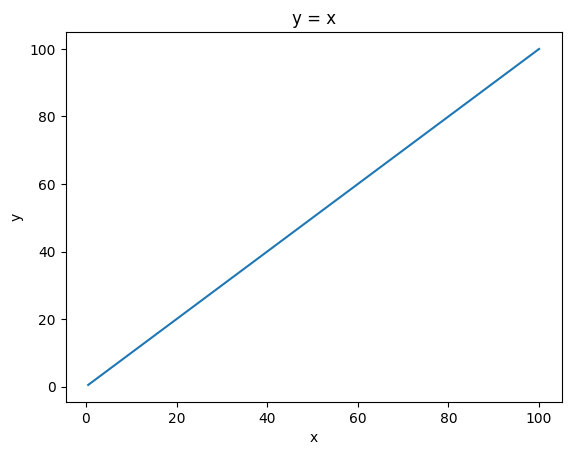

In [41]:
x = np.arange(0.5,100.5,0.5)
y = x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x")
plt.show()


2. $\text {y = x}^2$

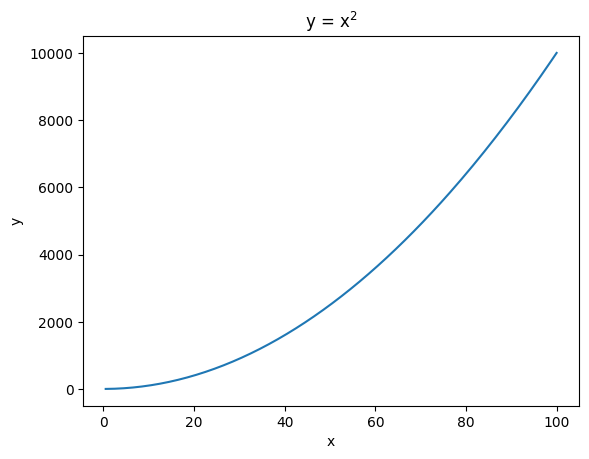

In [42]:
y = x**2
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"y = x$^2$")
plt.show()

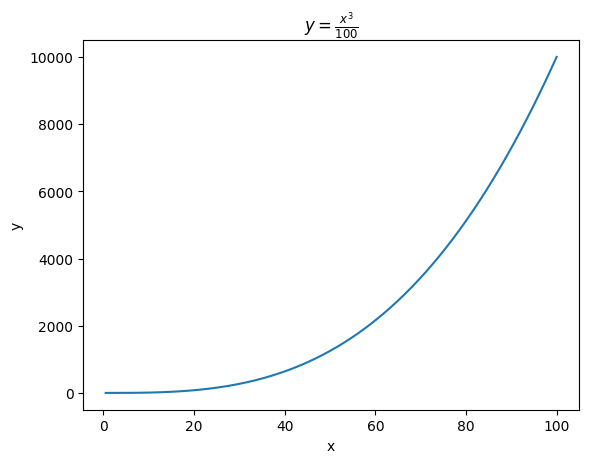

In [43]:
y = (x**3)/100
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"$y = \frac{x^3}{100}$")
plt.show()

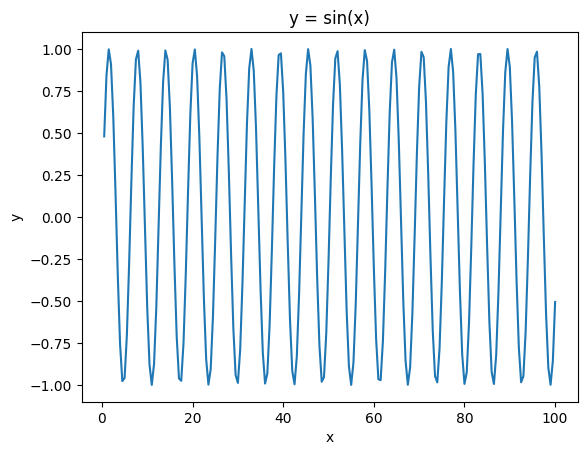

In [44]:
y = np.sin(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"y = sin(x)")
plt.show()

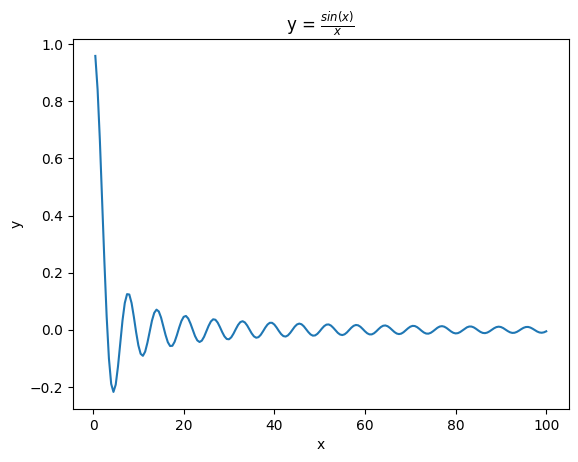

In [45]:
y = (np.sin(x)/x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"y = $\frac{sin(x)}{x}$")
plt.show()

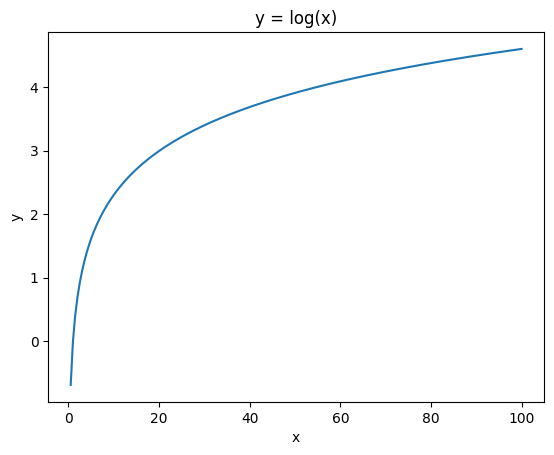

In [46]:
y = np.log(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"y = log(x)")
plt.show()

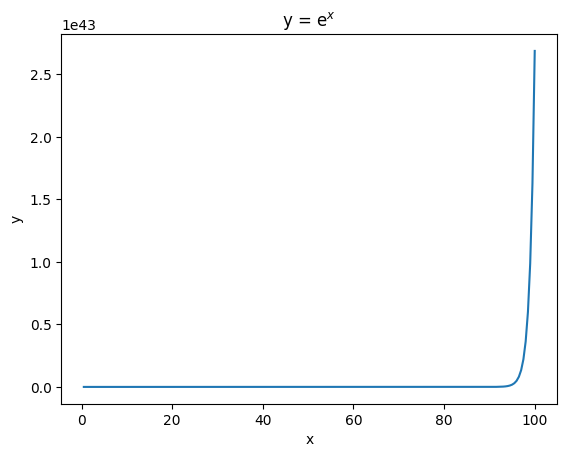

In [47]:
y = np.exp(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"y = e$^x$")
plt.show()

#### Question 10

Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [49]:
A = np.random.uniform(1,2,(20,5))
A.shape

(20, 5)

In [51]:
import pandas as pd

df = pd.DataFrame(A)
df.columns = ["a","b","c","d","e"]
df

,a,b,c,d,e
0,1.206760,1.725670,1.021929,1.007681,1.131152
1,1.148129,1.351424,1.829610,1.749132,1.194204
2,1.460634,1.960029,1.119355,1.963918,1.662899
3,1.691902,1.214333,1.944799,1.407165,1.765732
4,1.661121,1.450454,1.472291,1.957726,1.419734
5,1.706200,1.682555,1.581405,1.652181,1.064048
6,1.020152,1.969601,1.398508,1.301880,1.438534
7,1.942574,1.313656,1.618026,1.171698,1.463768
8,1.348555,1.648878,1.749918,1.164776,1.254471
9,1.774480,1.585353,1.372953,1.856634,1.896348


In [59]:
standard_deviation = df.std()
standard_deviation_highest = standard_deviation.max()
print(f"Column having highest standard deviation: {standard_deviation.idxmax()}, standard deviation: {standard_deviation_highest}")


Column having highest standard deviation: d, standard deviation: 0.3114458792700338


In [62]:
mean = df.mean(axis=1)
mean_lowest = mean.min()
print(f"Row having lowest mean: {mean.idxmin()}, mean: {mean_lowest}")

Row having lowest mean: 0, mean: 1.2186383316299267


#### Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [72]:
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
df

,a,b,c,d,e,f,g
0,1.206760,1.725670,1.021929,1.007681,1.131152,6.093192,LT8
1,1.148129,1.351424,1.829610,1.749132,1.194204,7.272499,LT8
2,1.460634,1.960029,1.119355,1.963918,1.662899,8.166835,GT8
3,1.691902,1.214333,1.944799,1.407165,1.765732,8.023931,GT8
4,1.661121,1.450454,1.472291,1.957726,1.419734,7.961327,LT8
5,1.706200,1.682555,1.581405,1.652181,1.064048,7.686390,LT8
6,1.020152,1.969601,1.398508,1.301880,1.438534,7.128676,LT8
7,1.942574,1.313656,1.618026,1.171698,1.463768,7.509722,LT8
8,1.348555,1.648878,1.749918,1.164776,1.254471,7.166598,LT8
9,1.774480,1.585353,1.372953,1.856634,1.896348,8.485768,GT8


In [76]:
print(f"Number of rows where column g has value LT8: {len(df[df['g'] == 'LT8'])}")
print(f"Standard deviation of column f where column g has value LT8: {df[df['g'] == 'LT8']['f'].std()}")
print(f"Standard deviation of column f where column g has value GT8: {df[df['g'] == 'GT8']['f'].std()}")

Number of rows where column g has value LT8: 15
Standard deviation of column f where column g has value LT8: 0.5625395161097227
Standard deviation of column f where column g has value GT8: 0.178701269870387


#### Question 12

Write a small piece of code to explain broadcasting in numpy.

##### Answer

Numpy broadcasting is a process which occurs when we apply arithmetic operators to numpy arrays having different shapes where the smaller array is repeated itself to match the dimensions.

In [82]:
np.random.seed(0)
a = np.random.randint(1,10,(5,1))
b = np.random.randint(1,10,(5,5))
c = np.random.randint(1,10,(1,5))
a,b,c

(array([[6],
        [1],
        [4],
        [4],
        [8]]),
 array([[4, 6, 3, 5, 8],
        [7, 9, 9, 2, 7],
        [8, 8, 9, 2, 6],
        [9, 5, 4, 1, 4],
        [6, 1, 3, 4, 9]]),
 array([[2, 4, 4, 4, 8]]))

In [81]:
# adding a and b even though they do not have same shape
a+b  # a is broadcasted to shape of b by repeating itself

array([[10, 12,  9, 11, 14],
       [ 8, 10, 10,  3,  8],
       [12, 12, 13,  6, 10],
       [13,  9,  8,  5,  8],
       [14,  9, 11, 12, 17]])

In [83]:
b+c # c is broadcasted to shape of b by repeating itself

array([[ 6, 10,  7,  9, 16],
       [ 9, 13, 13,  6, 15],
       [10, 12, 13,  6, 14],
       [11,  9,  8,  5, 12],
       [ 8,  5,  7,  8, 17]])

In [84]:
a+c # a and c are broadcasted to shape of each other by repeating themselves

array([[ 8, 10, 10, 10, 14],
       [ 3,  5,  5,  5,  9],
       [ 6,  8,  8,  8, 12],
       [ 6,  8,  8,  8, 12],
       [10, 12, 12, 12, 16]])

In [85]:
d = 2
a+d # d is broadcasted to shape of a by repeating itself

array([[ 8],
       [ 3],
       [ 6],
       [ 6],
       [10]])

In [86]:
a*d # d is broadcasted to shape of a by repeating itself

array([[12],
       [ 2],
       [ 8],
       [ 8],
       [16]])

Two dimensions are compatible when both of them are equal or when unequal atleast one of them is 1. Numpy compares the shape of the two arrays element-wise and starts with the rightmost element.

In [88]:
a = np.random.randint(1,10,(5,1,3))
b = np.random.randint(1,10,(1,3,3))
a+b, (a+b).shape 

(array([[[12, 12, 11],
         [13, 14,  4],
         [ 9, 14,  7]],
 
        [[ 6,  8, 14],
         [ 7, 10,  7],
         [ 3, 10, 10]],
 
        [[10,  9, 15],
         [11, 11,  8],
         [ 7, 11, 11]],
 
        [[10,  9, 12],
         [11, 11,  5],
         [ 7, 11,  8]],
 
        [[10,  9, 17],
         [11, 11, 10],
         [ 7, 11, 13]]]),
 (5, 3, 3))

#### Question 13

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [92]:
def argmin(arr):
    min = arr[0]
    min_index = 0
    for i in range(1,len(arr)):
        if arr[i] < min:
            min = arr[i]
            min_index = i
    return min_index

a = np.array([5,3,6,4,9,1,2,7,8])
b = np.array([3,1,4,5,6,2,4,1])
argmin(a), np.argmin(a), argmin(b), np.argmin(b)

(5, 5, 1, 1)

Even if there are two indices with the smallest element in the array, both the functions return the first occurence of the smallest element in the array.